In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import random as r

In [186]:
def tour_to_matrix(tour):
    n = len(tour)
    M = np.zeros((n,n))
    for i in range(0,n):
        M[tour[i],i] = 1
    return M

def matrix_to_tour(M):
    n = M.shape[0]
    if not np.sum(np.sum(M,1)==np.ones(n))==n or not np.sum(np.sum(M,0)==np.ones(n))==n:
        print('Invalid matrix')
        return(None)
    else:
        tour =[]
        for j in range(0,n):
            for i in range(0,n):
                if M[i,j]==1:
                    tour.append(i)
    return(tour)

def length_of_tour(tour,D):
    d=0
    for i in range(0,len(tour)-1):
        d+= D[tour[i],tour[i+1]]
    return d

def sigmoid(x):
    return ((1+np.tanh(x/0.02))/2)
def invsigmoid(x):
    return 0.02*np.arctanh(2*x-1)

def continuous_hopfield_neuron(u,t,Alpha,Beta,Theta,Omega,D):
    dudt= []
    N = u.shape[0]
    n = int(np.sqrt(N))
    #neuron constants set to 1
    C=np.ones((N))
    R=np.ones((N))
    I=Theta*n*np.ones((N))
    for i in range(0,n):
        for X in range(0,n):
            dui = - u[n*i+X] +Theta*15
            for j in range(0,n):
                if j!=i:
                    dui+=-Alpha*sigmoid(u[n*j+X])
            for Y in range(0,n):
                if Y!=X:
                    dui+=-Beta*sigmoid(u[n*i+Y])
                dui+=-Omega*D[X,Y]*(sigmoid(u[np.mod(i+1,n)*n+Y])+sigmoid(u[np.mod(i-1,n)*n+Y]))
            for Y in range(0,n):
                for j in range(0,n):
                    dui+=-Theta*(sigmoid(u[n*j+Y]))
            dudt.append(dui)
    return np.array(dudt)

def run_continuous_hopfield(v0,steps,T,Alpha,Beta,Theta,Omega,D):
    t = np.linspace(0, T, steps)
    u0 = v0
    sol = sp.integrate.odeint(continuous_hopfield_neuron, u0, t, args=(Alpha,Beta,Theta,Omega,D,))
    v_sol = sigmoid(sol)
    return v_sol

/Users/ramon/opt/anaconda3/envs/networks/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramon/opt/anaconda3/envs/networks/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramon/opt/anaconda3/envs/networks/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramon/opt/anaconda3/envs/networks/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

Invalid matrix


TypeError: object of type 'NoneType' has no len()

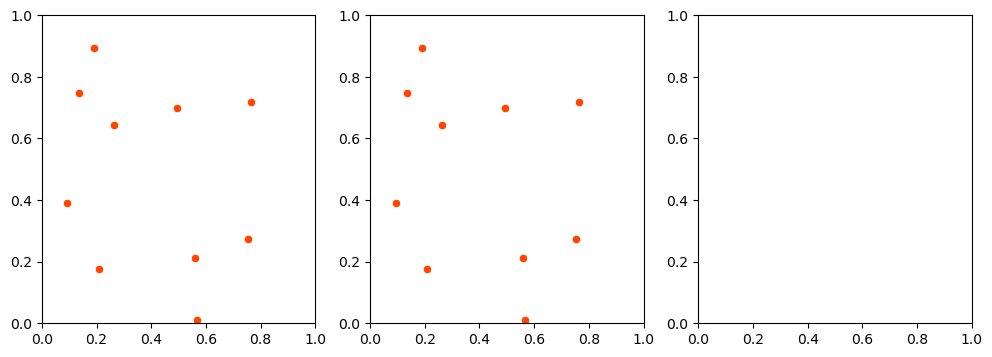

In [245]:
Alpha = 600
Beta = 600
Theta = 200
Omega = 500
n = 10
cities_position = []
for i in range(0,n):
    cities_position.append(np.random.rand(2))

D = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        D[i,j] = np.sqrt((cities_position[i][0]-cities_position[j][0])**2 + (cities_position[i][1]-cities_position[j][1])**2)

cities_position_matrix = np.array(cities_position)

fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,4)
sns.scatterplot(x=cities_position_matrix[:,0],y=cities_position_matrix[:,1],ax=ax[0],color = 'orangered')
sns.scatterplot(x=cities_position_matrix[:,0],y=cities_position_matrix[:,1],ax=ax[1],color = 'orangered')

ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)

IC_matrix = np.ones((n,n))*invsigmoid(0.1)
IC_withnoise = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        IC_withnoise[i,j] = IC_matrix[i,j]+0.05*IC_matrix[i,j]*(2*np.random.rand()-1)


states = run_continuous_hopfield((IC_withnoise).flatten(),10000,250,Alpha,Beta,Theta,Omega,D)
found_tour = matrix_to_tour(np.round(states[len(states)-1].reshape(n,n)))
for j in range(0,len(found_tour)-1):
    ax[0].plot([cities_position[found_tour[j]][0],cities_position[found_tour[j+1]][0]],[cities_position[found_tour[j]][1],cities_position[found_tour[j+1]][1]],color='black')

random_tour = r.sample(range(0,n), n)
for j in range(0,len(random_tour)-1):
    ax[1].plot([cities_position[random_tour[j]][0],cities_position[random_tour[j+1]][0]],[cities_position[random_tour[j]][1],cities_position[random_tour[j+1]][1]],color='black')

print(length_of_tour(found_tour,D))
print(length_of_tour(random_tour,D))

plt.tight_layout()
plt.show()

<Axes: >

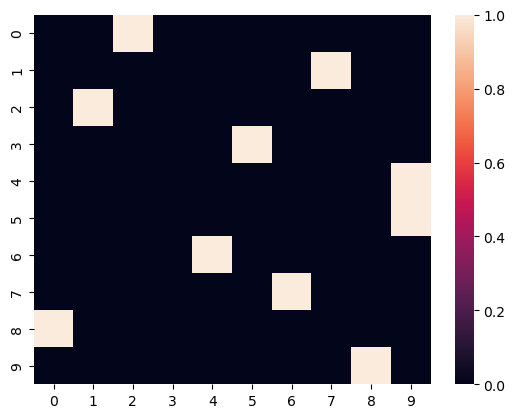

In [238]:
sns.heatmap(np.round(states[len(states)-1].reshape(n,n)))

In [195]:
null =[]
for i in range(0,1000):
    random_tour = r.sample(range(0,n), n)
    null.append(length_of_tour(random_tour,D))

(array([ 1.,  1.,  1.,  0.,  0.,  1.,  2.,  3.,  4.,  3., 10.,  8., 11.,
         8., 16.,  7., 15., 19., 34., 27., 44., 34., 52., 57., 58., 47.,
        52., 43., 64., 56., 46., 51., 40., 31., 28., 29., 25., 15., 19.,
        13.,  7.,  7.,  4.,  2.,  3.,  1.,  0.,  0.,  0.,  1.]),
 array([3.04106548, 3.12809609, 3.21512669, 3.30215729, 3.38918789,
        3.47621849, 3.56324909, 3.6502797 , 3.7373103 , 3.8243409 ,
        3.9113715 , 3.9984021 , 4.0854327 , 4.17246331, 4.25949391,
        4.34652451, 4.43355511, 4.52058571, 4.60761631, 4.69464692,
        4.78167752, 4.86870812, 4.95573872, 5.04276932, 5.12979992,
        5.21683053, 5.30386113, 5.39089173, 5.47792233, 5.56495293,
        5.65198354, 5.73901414, 5.82604474, 5.91307534, 6.00010594,
        6.08713654, 6.17416715, 6.26119775, 6.34822835, 6.43525895,
        6.52228955, 6.60932015, 6.69635076, 6.78338136, 6.87041196,
        6.95744256, 7.04447316, 7.13150376, 7.21853437, 7.30556497,
        7.39259557]),
 <BarContainer

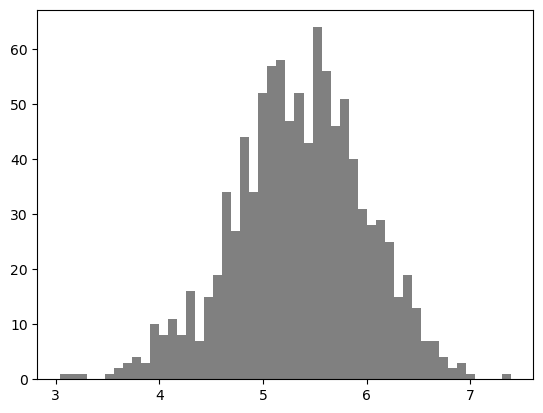

In [200]:
plt.hist(null,50,color='grey')
ax[2].


/Users/ramon/opt/anaconda3/envs/networks/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramon/opt/anaconda3/envs/networks/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramon/opt/anaconda3/envs/networks/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramon/opt/anaconda3/envs/networks/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

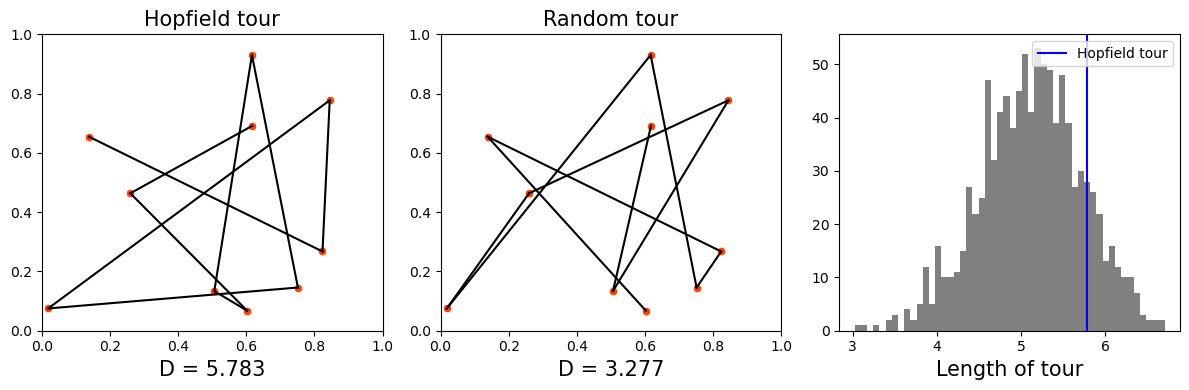

In [244]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,4)
sns.scatterplot(x=cities_position_matrix[:,0],y=cities_position_matrix[:,1],ax=ax[0],color = 'orangered')
sns.scatterplot(x=cities_position_matrix[:,0],y=cities_position_matrix[:,1],ax=ax[1],color = 'orangered')

ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)

for j in range(0,len(found_tour)-1):
    ax[0].plot([cities_position[found_tour[j]][0],cities_position[found_tour[j+1]][0]],[cities_position[found_tour[j]][1],cities_position[found_tour[j+1]][1]],color='black')
    ax[1].plot([cities_position[random_tour[j]][0],cities_position[random_tour[j+1]][0]],[cities_position[random_tour[j]][1],cities_position[random_tour[j+1]][1]],color='black')
null =[]
for i in range(0,1000):
    random_tour = r.sample(range(0,n), n)
    null.append(length_of_tour(random_tour,D))
ax[2].hist(null,bins=50,color='grey')
ax[2].axvline(x = length_of_tour(found_tour,D), color = 'b',label='Hopfield tour')
ax[2].legend(loc='upper right')
ax[2].set_xlabel('Length of tour',fontsize=15)
ax[0].set_title('Hopfield tour',fontsize=15)
ax[1].set_title('Random tour',fontsize=15)
ax[0].set_xlabel('D = ' + str(length_of_tour(found_tour,D))[0:5],fontsize=15)
ax[1].set_xlabel('D = ' + str(length_of_tour(random_tour,D))[0:5],fontsize=15)


plt.tight_layout()
plt.show()
#fig.savefig('travellingsalesman.pdf', format="pdf", bbox_inches="tight")